# Part I - (Airline OnTime Performance)
## by (Eloebhose Kingsley Osazele)

## Introduction

> The dataset used in this Exploration project reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, and so on. The information contained in this dataset was tracked by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS). Dataset from 2008 was used in this project which contains approximately 2.4 million rows of data. The data can be downloaded from here and the discription is provided here. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the dataset
airline_df = pd.read_csv('2008.csv.bz2')

In [3]:
# load the airport dataset and the carriers dataset, this will be used to replace the IATA code
# with the airport name and the carrier name
airport_df = pd.read_csv('airports.csv')
carriers_df = pd.read_csv('carriers.csv')

print(airport_df.head())
print('/n')
print(carriers_df.head())

  iata               airport
0  00M              Thigpen 
1  00R  Livingston Municipal
2  00V           Meadow Lake
3  01G          Perry-Warsaw
4  01J      Hilliard Airpark
/n
  Code                    Description
0  02Q                  Titan Airways
1  04Q             Tradewind Aviation
2  05Q            Comlux Aviation, AG
3  06Q  Master Top Linhas Aereas Ltd.
4  07Q            Flair Airlines Ltd.


In [4]:
# High-level overview of data shape and composition
print('Shape:{}\n'.format(airline_df.shape))
print(airline_df.info())
print()
airline_df.head()

Shape:(2389217, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory u

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


A copy of the  Airline dataframe would be made called 'Airline_copy', in which all wrangling and exploration would be performed on.

In [5]:
Airline_copy = airline_df.copy()

In [6]:
# create full_date column
Airline_copy['Date'] = pd.to_datetime(dict(year=Airline_copy.Year, month=Airline_copy.Month, 
                                           day=Airline_copy.DayofMonth))

In [7]:
Airline_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 30 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: datetime64[ns](1), float64(

Looking at the datatypes of the dataset, columns 'cancelled' and 'Diverted' needs to be changed to categorical data types. Also, the columns 'Year', 'Month', 'DayofMonth', 'DayofWeek' are in integer data types, these needs to be changed to string data types.

In [8]:
# Renaming the numeric values to categorical in columns Cancelled and Diverted 
Airline_copy['Cancelled'] = Airline_copy['Cancelled'].replace([1, 0], ["Cancelled", "Not Cancelled"])
Airline_copy['Diverted'] = Airline_copy['Diverted'].replace([1, 0], ["Diverted", "Not Diverted"])

In [9]:
# Changing the Cancelled column data type to ordered categorical
Cancelled_classes = ['Cancelled','Not Cancelled']
Cancelled_ordered_new = pd.api.types.CategoricalDtype(ordered=True,categories=Cancelled_classes)
Airline_copy['Cancelled']=Airline_copy['Cancelled'].astype(Cancelled_ordered_new)

In [10]:
# Changing the Diverted column data type to ordered categorical
Diverted_classes = ['Diverted','Not Diverted']
Diverted_ordered_new = pd.api.types.CategoricalDtype(ordered=True,categories=Diverted_classes)
Airline_copy['Diverted']=Airline_copy['Diverted'].astype(Diverted_ordered_new)

In [11]:
# change columns  'Year', 'Month', 'DayofMonth', 'DayofWeek' to string
Airline_copy[Airline_copy.columns[0:4]] = Airline_copy[Airline_copy.columns[0:4]].astype(object)

In [12]:
# Check column data types to confirm if changes have been implemented
Airline_copy.dtypes

Year                         object
Month                        object
DayofMonth                   object
DayOfWeek                    object
DepTime                     float64
CRSDepTime                    int64
ArrTime                     float64
CRSArrTime                    int64
UniqueCarrier                object
FlightNum                     int64
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime              float64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                      float64
TaxiOut                     float64
Cancelled                  category
CancellationCode             object
Diverted                   category
CarrierDelay                float64
WeatherDelay                float64
NASDelay                    float64
SecurityDelay               

Now, let us check for null values in our dataset

In [13]:
Airline_copy.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
Date                       0
dtype: int64

We can see that there is quite a lot of rows in the dataset that contains null values, and if these rows are removed from the dataset, a large number of observations would be lost, **note that only the 'cancellationcode', and the columns containing the reasons for delay contains high number of null values. It is possible that data was recorded only for delayed, and cancelled flights for these columns,therefore flights that were not delayed or cancelled were left with null values. so the null values in these columns would be filled, where the filled values will represent the null values. Also, Values would be imputed using interpolation method for columns ArrDelay, DepDelay, ArrTime,DepTime, Elapsed Time columns. This is because the values of these columns are meant to be present, maybe due to human error, these values are missing**.

In [14]:
Airline_copy.head(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,9.0,Not Cancelled,NaN,Not Diverted,16.0,0.0,0.0,0.0,0.0,2008-01-03
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,8.0,Not Cancelled,NaN,Not Diverted,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,14.0,Not Cancelled,NaN,Not Diverted,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,7.0,Not Cancelled,NaN,Not Diverted,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,10.0,Not Cancelled,NaN,Not Diverted,16.0,0.0,0.0,0.0,0.0,2008-01-03
5,2008,1,3,4,2024.0,2020,2325.0,2325,WN,51,...,7.0,Not Cancelled,NaN,Not Diverted,NaN,NaN,NaN,NaN,NaN,2008-01-03
6,2008,1,3,4,1753.0,1745,2053.0,2050,WN,940,...,7.0,Not Cancelled,NaN,Not Diverted,NaN,NaN,NaN,NaN,NaN,2008-01-03
7,2008,1,3,4,622.0,620,935.0,930,WN,2621,...,19.0,Not Cancelled,NaN,Not Diverted,NaN,NaN,NaN,NaN,NaN,2008-01-03
8,2008,1,3,4,1944.0,1945,2210.0,2215,WN,389,...,15.0,Not Cancelled,NaN,Not Diverted,NaN,NaN,NaN,NaN,NaN,2008-01-03
9,2008,1,3,4,1453.0,1425,1716.0,1650,WN,519,...,13.0,Not Cancelled,NaN,Not Diverted,11.0,0.0,0.0,0.0,15.0,2008-01-03


In [15]:
# Fill the null values in the CancellationCode Column with "N" where "N" represents the null values
# Since it is assumed that the null values in these columns represent flights that did not cancel
# their Flights, hence they don't have any cancellation reason.
Airline_copy.CancellationCode.fillna('N', inplace=True)

**Note: The null values in the reasons for delay columns such as CarrierDelay, WeatherDelay, NASDelay, SecurityDelay,LateAircraftDelay, were filled with 0 because it is assumed that only delayed flights have properly documented reasons for delay. Therefore the null values in these columns just means that there weren't delayed flights.**

In [16]:
Airline_copy.CarrierDelay.fillna(0, inplace=True)
Airline_copy.WeatherDelay.fillna(0, inplace=True)
Airline_copy.NASDelay.fillna(0, inplace=True)
Airline_copy.SecurityDelay.fillna(0, inplace=True)
Airline_copy.LateAircraftDelay .fillna(0, inplace=True)

In [17]:
# Null values imputation of columns relating to Arrival,Departure, TimeIn &Timeout using interpolation
Airline_copy['DepTime'] = Airline_copy['DepTime'].interpolate(method='linear', limit_direction='both', axis=0) 
Airline_copy['ArrTime'] = Airline_copy['ArrTime'].interpolate(method='linear', limit_direction='both', axis=0) 

Airline_copy['ActualElapsedTime'] = Airline_copy['ActualElapsedTime'].interpolate(method='linear', limit_direction ='both', axis=0) 
Airline_copy['CRSElapsedTime'] = Airline_copy['CRSElapsedTime'].interpolate(method='linear', limit_direction ='both', axis=0)

Airline_copy['AirTime'] = Airline_copy['AirTime'].interpolate(method='linear', limit_direction ='both', axis=0) 
Airline_copy['ArrDelay'] = Airline_copy['ArrDelay'].interpolate(method='linear', limit_direction ='both', axis=0) 
Airline_copy['DepDelay'] = Airline_copy['DepDelay'].interpolate(method='linear', limit_direction ='both', axis=0)

Airline_copy['TaxiIn'] = Airline_copy['TaxiIn'].interpolate(method='linear', limit_direction ='both', axis=0) 
Airline_copy['TaxiOut'] = Airline_copy['TaxiOut'].interpolate(method='linear', limit_direction ='both', axis=0)

In [18]:
Airline_copy.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum              42452
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
Date                     0
dtype: int64

In [19]:
# we are going to combine the various columns that documents the reasons for delay into one columns. 
# This would makes our analyses easier
Airline_copy = pd.melt(Airline_copy,id_vars=['Date','Year','Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime',
                    'UniqueCarrier','FlightNum','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime',
                    'ArrDelay','DepDelay','Origin','Dest','Distance','TaxiIn','TaxiOut','Cancelled',
                    'CancellationCode', 'Diverted'], value_vars=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
                                                                 'LateAircraftDelay'],
       var_name='ReasonsForDelay', value_name='DelayInMinutes')

In [20]:
#drop duplicated values 
Airline_copy = Airline_copy.drop_duplicates()

In [21]:
# join the carrier dataset with the airline dataset
Airline_copy=Airline_copy.merge(carriers_df, how='inner', left_on='UniqueCarrier', right_on='Code')
Airline_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11946065 entries, 0 to 11946064
Data columns (total 29 columns):
Date                 datetime64[ns]
Year                 object
Month                object
DayofMonth           object
DayOfWeek            object
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            category
CancellationCode     object
Diverted             category
ReasonsForDelay      object
DelayInMinutes       float64
Code                 object
Description          object
dtypes: category(2), datetime64[ns](1), float64(10), in

In [22]:
# The Code column will be dropped, since it is the same as the Unique Carrier column 
# and  Descrioption column will be replaced with Airlines
Airline_copy.drop(columns=['Code'], axis=1, inplace=True)
Airline_copy.rename(columns={'Description': 'Airlines'}, inplace=True)

In [23]:
# join the airport name(Origin) dataset with the Airlines_Copy dataframe
Airline_copy=Airline_copy.merge(airport_df, how='inner', left_on='Origin', right_on='iata')
Airline_copy.drop(columns=['iata'], axis=1, inplace=True)
Airline_copy.rename(columns={'airport': 'Origin1'}, inplace=True)

In [24]:
# join the airport name(Destination) dataset with the Airlines_Copy dataframe
Airline_copy=Airline_copy.merge(airport_df, how='inner', left_on='Dest', right_on='iata')
Airline_copy.drop(columns=['iata'], axis=1, inplace=True)
Airline_copy.rename(columns={'airport': 'Destination'}, inplace=True)

In [25]:
Airline_copy.head()

,Date,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,ReasonsForDelay,DelayInMinutes,Airlines,Origin1,Destination
0,2008-01-03,2008,1,3,4,1343.0,1325,1451.0,1435,WN,...,4.0,9.0,Not Cancelled,N,Not Diverted,CarrierDelay,16.0,Southwest Airlines Co.,William P Hobby,Adams
1,2008-01-04,2008,1,4,5,1341.0,1325,1458.0,1435,WN,...,5.0,15.0,Not Cancelled,N,Not Diverted,CarrierDelay,5.0,Southwest Airlines Co.,William P Hobby,Adams
2,2008-01-05,2008,1,5,6,1346.0,1325,1456.0,1435,WN,...,3.0,7.0,Not Cancelled,N,Not Diverted,CarrierDelay,0.0,Southwest Airlines Co.,William P Hobby,Adams
3,2008-01-06,2008,1,6,7,1335.0,1325,1445.0,1435,WN,...,5.0,11.0,Not Cancelled,N,Not Diverted,CarrierDelay,0.0,Southwest Airlines Co.,William P Hobby,Adams
4,2008-01-07,2008,1,7,1,1325.0,1325,1433.0,1435,WN,...,6.0,8.0,Not Cancelled,N,Not Diverted,CarrierDelay,0.0,Southwest Airlines Co.,William P Hobby,Adams


For Ease of Analysis, new columns will be created for the ArrDelay and DepDelay columns called ArrDelay1 and DepDelay1, which will be categorical and would indicate whether a flight arrived or departed early or late. To know whether a flight arrived early, we are going to follow the definition of the Federal Aviation Administration (FAA), which considers a flight to be delayed when it is 15 minutes later than its scheduled time.This would help simplify our analysis.

In [26]:
#Create the ArrDelay1 column from existing column ArrDelay
ArrDelay1=[]

for row in Airline_copy['ArrDelay']:
    if row < 15 :    ArrDelay1.append('OnTime')
    else:            ArrDelay1.append('Late')
        

Airline_copy['ArrDelay1']=ArrDelay1

In [27]:
#Create the DepDelay1 column from existing column DepDelay
DepDelay1=[]

for row in Airline_copy['DepDelay']:
    if row < 15 :    DepDelay1.append('OnTime')
    else:            DepDelay1.append('Late')
        

Airline_copy['DepDelay1']=DepDelay1

In [28]:
print(Airline_copy[['DepDelay','DepDelay1','ArrDelay','ArrDelay1']].head())

   DepDelay DepDelay1  ArrDelay ArrDelay1
0      18.0      Late      16.0      Late
1      16.0      Late      23.0      Late
2      21.0      Late      21.0      Late
3      10.0    OnTime      10.0    OnTime
4       0.0    OnTime      -2.0    OnTime


### What is the structure of your dataset?

> The dataset contains about 2.4 millions records and 29 columns, although during the preliminary wrangling section of this project, the dataset was assessed to check for quality and tidiness issues. This led us to create new columns for the Origin and Dest columns named Origin1 and Destination which is more descriptive than the origin column. Same thing was done for the Unique Carrier columns, which was now named Airlines. The variables in the dataset are mainly numerical with some categorical variables like CancellationCode. A proper description of each of the variables in the dataset provided during the **Data Expo 2009:Airline on Time Data** is provided below:

**Variables description:**

| Number| Names| Description| Notes|
|-:|-:|-:|-:|
| 1| Year| 1987-2008| Only the 2008 dataset was used in this project|
| 2| Month| 1-12| |
| 3| DayofMonth| 1-31| |
| 4| DayOfWeek| 1(Monday)-7(Sunday)| |
| 5| DepTime| actual departure time (local, hhmm)| |
| 6| CRSDepTime| Sheduled departure time (local, hhmm)| |
| 7| ArrTime| actual arrival time (local, hhmm)| |
| 8| CRSArrTime| Scheduled arrival time (local, hhmm)| |
| 9| UniqueCarrier| unique carrier code| |
|10| FlightNum| Flight Number| |
|11| TailNum| Plane Tail Number | |
|12| ActualElapsedTime| in minutes | |
|13| CRSElapsedTime| in minutes | |
|14| AirTime| in minutes | |
|15| ArrDelay| arrival delay,in minutes |A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS). |
|16| DepDelay| departure delay,in minutes ||
|17| Origin| Origin IATA airport code | |
|18| Dest| destination IATA airport code | |
|19| Distance| in miles| |
|20| TaxiIn| TaxiIn time, in minutes| |
|21| TaxiOut| TaxiOut time, in minutes| |
|22| Cancelled| was the flights cancelled?| |
|23| CancellationCode| reason for cancellation (A = carrier, B = weather, C = NAS, D = security)| |
|24| Diverted| 1=yes, 0=no| |
|25| CarrierDelay| in mnutes| Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.|
|26| WeatherDelay| in minutes| Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.|
|27| NASDelay| in minutes|Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. |
|28| SecurityDelay| in minutes|Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas. |
|29| LateAircraftDelay| in minutes|Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation. |

### What is/are the main feature(s) of interest in your dataset?

> This project is mainly interested in knowing the reasons for delay, so the following questions would help us in knowing the major reasons and determinants of delay.

-  What major factors are causing flights arrival and departure delay?
-  Is distance a major determinants of delayed flights?
-  Are flights delay due to the unique carriers?
-  Are they any other interesting patterns that affected delayed flights?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features that will help the invetigation in this dataset is listed below;

- DepDelay and DepDelay1 column
- ArrDelay and ArrDelay1 column
- Reason for delay(This column was created by joining the CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay Columns) and DelayInMinutes columns
- Unique Carrier column
- Distance column

## Univariate Exploration

> In this section, we will investigate distributions of individual variables.



**We are going to investigate firstly the variables of interest then go to other variables**

**Let us start with the main variable of interest DepDelay and ArrDelay**

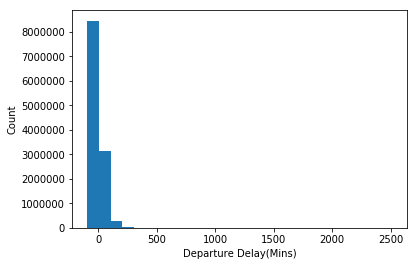

In [29]:
# use matplotlib's hist method to visualize the DepDelay column
bins=np.arange(-92.0,Airline_copy.DepDelay.max()+100,100)
plt.hist(data=Airline_copy, x='DepDelay', bins=bins);
plt.xlabel('Departure Delay(Mins)');
plt.ylabel('Count');

From the graph above, we can see that they are outliers affecting the results of the plot. To see these outliers let us create a calculate the upper and lower outliers and create a boxplot.

In [30]:
Airline_copy.DepDelay.describe()

count    1.194606e+07
mean     1.176028e+01
std      3.670638e+01
min     -9.200000e+01
25%     -4.000000e+00
50%      0.000000e+00
75%      1.100000e+01
max      2.467000e+03
Name: DepDelay, dtype: float64

In [31]:
#Calculate the upper and lower outliers for the DepDelay column
IQR= 11+4
Upperbound=11+(1.5*IQR)
Lowerbound=-4-(1.5*IQR)
print(Upperbound)
print(Lowerbound)

33.5
-26.5


Any value greater than 33.5 is an outlier and any value less than -26.5 is also an outlier. So, we are going to use the xlim method to exclude all the outliers so we can see our datset.

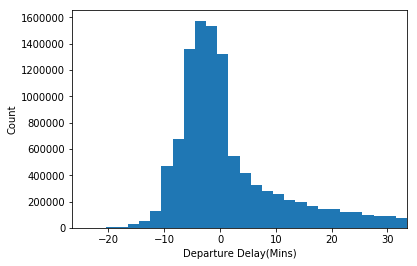

In [32]:
# Create a new histogram for the Departure Delay column which excludes the outliers in the 
# Departure Delay column by applying the xlim method.
bins=np.arange(-26.5,Airline_copy.DepDelay.max()+2,2)
plt.hist(data=Airline_copy, x='DepDelay', bins=bins)
plt.xlim((-26.5,33.5));
plt.xlabel('Departure Delay(Mins)');
plt.ylabel('Count');

According to the Federal Aviation Administration, a Flight is considered to be delayed when it is 15 minutes later than its scheduled time, And from the second plot above, the plot indicates that more flights have a negative departure delay time and a positive departure delay time less than or equal to 33 minutes. The negative departure time indicates that flights departed before the scheduled time. Also, the plots above are right skewed, which indicates that the mean is greater than the median. This tells us that more flights Departed ontime, that is before 15 minutes of the scheduled departure time. The new created column for the Departure Delay will give us the exact value or percentage of flights that departed ontime or departed late.

In [33]:
# Create a variable that store the value_counts of Depature Delays
df=Airline_copy.DepDelay1.value_counts()
df

OnTime    9291095
Late      2654970
Name: DepDelay1, dtype: int64

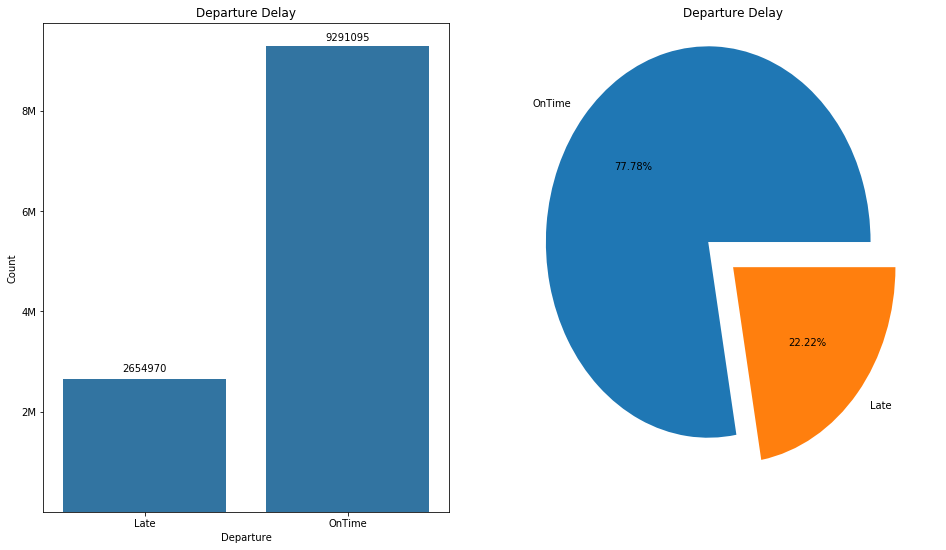

In [34]:
# Create a barchart and a piechart that shows the value and percentage of Departure Delays
plt.figure(figsize=[16,9])
plt.subplot(1,2,1)
base_color=sb.color_palette()[0]
sb.countplot(data=Airline_copy, x='DepDelay1',color=base_color);
plt.text(0,2800000,2654970, ha='center')
plt.text(1,9400000,9291095, ha='center')
plt.yticks([2000000,4000000,6000000,8000000], ['2M','4M','6M','8M'])
plt.xlabel('Departure');
plt.ylabel('Count');
plt.title('Departure Delay');


plt.subplot(1,2,2);
plt.pie(x=df, labels=df.index, explode=(0.2, 0), autopct='%.2f%%');
plt.title('Departure Delay');

The distribution of the numeric variable of the Departure Delay column, indicated to us that more flights have an early departure time, while the pie chart above properly tells us that 77.78% of flights departed early, while 22.22% of the flights departed late. The reasons for the 22.22% of the delayed flights would be made clear during the BiVariate Exploration of the dataset. 

Next, let us look into the ArrDelay Column

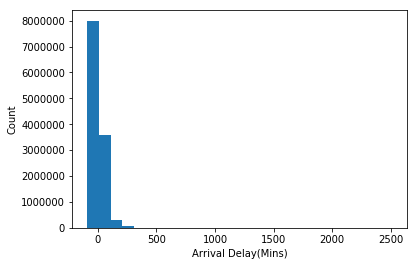

In [35]:
# use matplotlib's hist method to visualize the ArrDelay column
bins=np.arange(-91.0,Airline_copy.ArrDelay.max()+100,100)
plt.hist(data=Airline_copy, x='ArrDelay', bins=bins);
plt.xlabel('Arrival Delay(Mins)');
plt.ylabel('Count');

Just like the Departure Delay column, it is obvious that outliers are affecting the plotted data. so let us calculate the upper and lower bound and create a box plot.

In [36]:
Airline_copy.ArrDelay.describe()

count    1.194606e+07
mean     1.070268e+01
std      3.985229e+01
min     -9.100000e+01
25%     -9.000000e+00
50%      0.000000e+00
75%      1.500000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

In [37]:
#Calculate the upper and lower outliers for the ArrDelay column
IQR= 15+9
Upperbound=15+(1.5*IQR)
Lowerbound=-9-(1.5*IQR)
print(Upperbound)
print(Lowerbound)

51.0
-45.0


Any value greater than 51.0 is an outlier and any value less than -45.0 is also an outlier. So, we are going to use the xlim method to exclude all the outliers so we can see our datset.

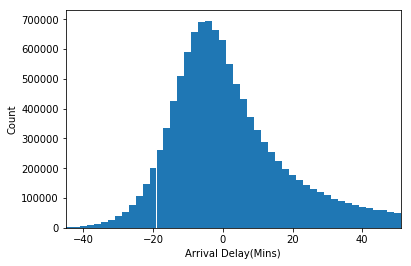

In [38]:
# Create a new histogram for the Arrival Delay column which excludes the outliers in the 
# Arrival Delay column by applying the xlim method.
bins=np.arange(-45.0,Airline_copy.ArrDelay.max()+2,2)
plt.hist(data=Airline_copy, x='ArrDelay', bins=bins)
plt.xlim((-45.0,51.0));
plt.xlabel('Arrival Delay(Mins)');
plt.ylabel('Count');

According to the Federal Aviation Administration, a Flight is considered to be delayed when it is 15 minutes later than its scheduled time, and from the plot above, which is almost normally distributed, but slightly skewed to the right. This means that the mean of the ArrDelay column is higher than the median of the column. This tells us that more flights have early arrival delay time, that is many flights arrived early. The value and percentage of the Arrival Delay column will be seen in the bar chart and the pie chart below.

In [39]:
# Create a variable that store the value_counts of Arrival Delays
df=Airline_copy.ArrDelay1.value_counts()
df

OnTime    8867400
Late      3078665
Name: ArrDelay1, dtype: int64

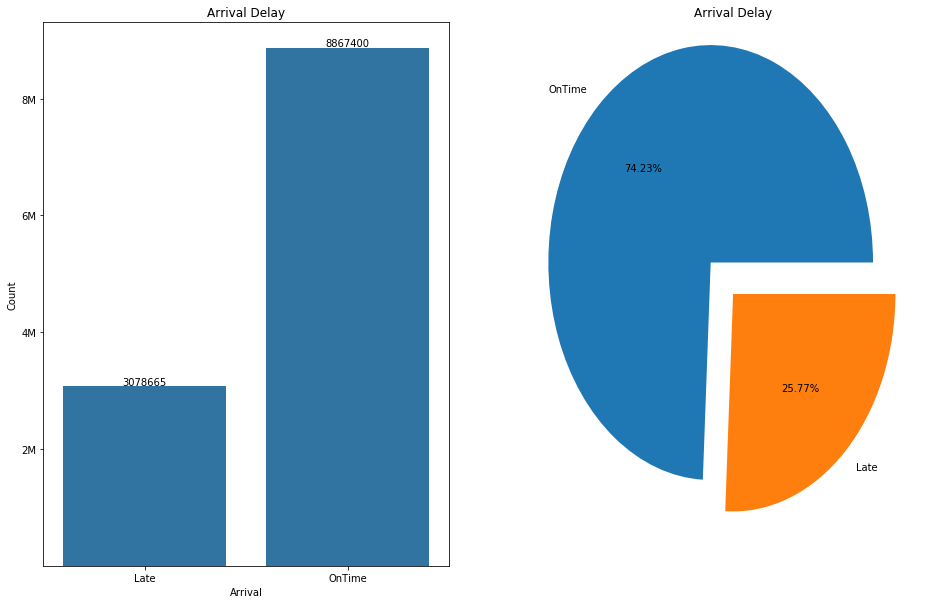

In [40]:
# Create a barchart and a piechart that shows the value and percentage of Arrival Delays
plt.figure(figsize=[16,10])
plt.subplot(1,2,1)
base_color=sb.color_palette()[0]
sb.countplot(data=Airline_copy, x='ArrDelay1',color=base_color);
plt.text(0,3100000,3078665, ha='center')
plt.text(1,8900000,8867400, ha='center')
plt.yticks([2000000,4000000,6000000,8000000], ['2M','4M','6M','8M'])
plt.xlabel('Arrival');
plt.ylabel('Count');
plt.title('Arrival Delay');


plt.subplot(1,2,2);
plt.pie(x=df, labels=df.index, explode=(0.2, 0), autopct='%.2f%%');
plt.title('Arrival Delay');

The distribution of the numeric variable of the Arrival Delay column, indicated to us that more flights have an early Arrival time, while the pie chart above properly tells us that 74.23% of flights Arrived early, while 25.77% of the flights Arrived late. The reasons for the 25.77% of the delayed  arrival flights would be made clear during the BiVariate Exploration of the dataset.

Next, let us look into the Reasons for delay column and the delay in minutes

In [41]:
delay = Airline_copy.groupby('ReasonsForDelay')['DelayInMinutes'].mean()
delay=delay.sort_values()
x= delay.index
y=delay.values

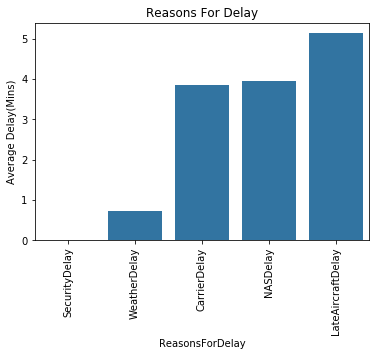

In [42]:
# Create a barchart that shows the average reasons for delay through the year 2008
base_color=sb.color_palette()[0]
sb.barplot(x=x, y=y, color=base_color)
plt.xticks(rotation=90)
plt.ylabel('Average Delay(Mins)')
plt.title('Reasons For Delay')
plt.show()

From the Average of the Reasons of Delay, we can see that the highest reason for delay had a delay time of up to 5 minutes on the average for the year 2008. This can be due to the low number of delayed flights for both Arrival and departed flights, but an interesting thing to note here is that even for the low number of delayed flights, Late Aircraft delay have the highest average delay. This tells us that for the few arrival delayed flights we have, was due to the late arrival of the same flight at a previous airport. This phenomenum is known as delay propagation.

Next, Let us look into UniqueCarrier column

In [43]:
df1=Airline_copy.Airlines.value_counts()

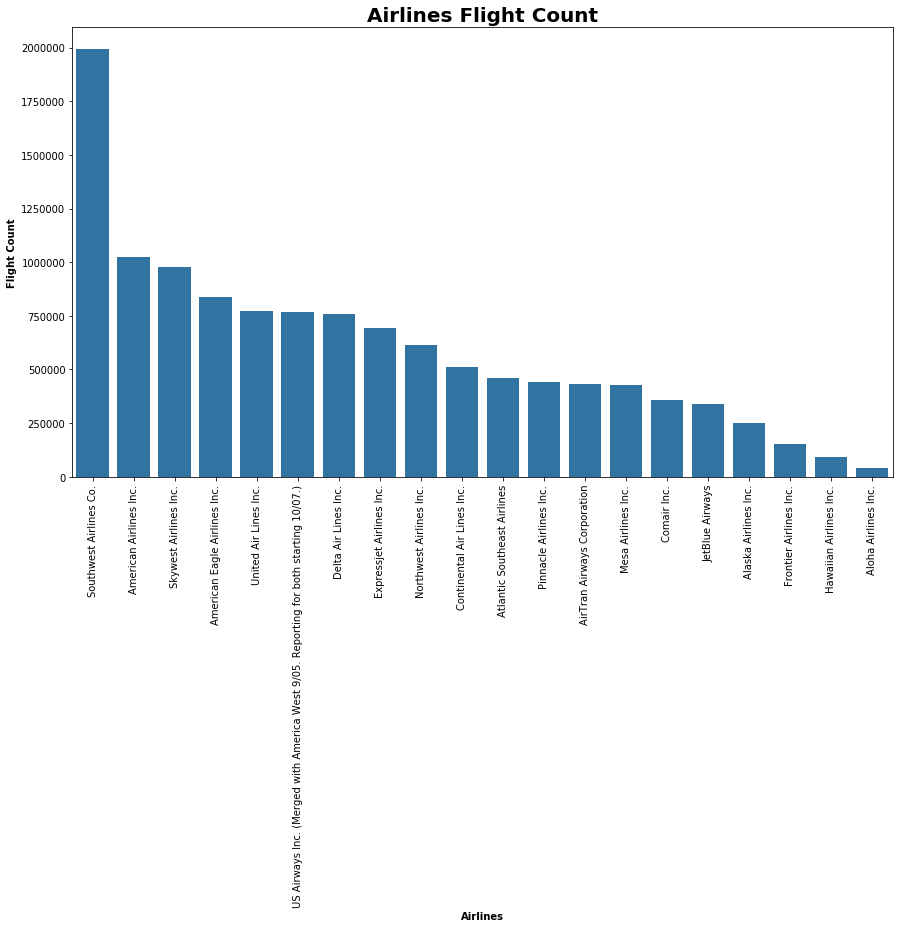

In [44]:
#Create a bar chart for Airlines column
plt.figure(figsize=[14.70, 8.27])
base_color=sb.color_palette()[0]
sb.barplot(x=df1.index, y=df1.values, color=base_color)
plt.xlabel('Airlines', size=10, weight='bold')
plt.ylabel('Flight Count', size=10, weight='bold')
plt.title('Airlines Flight Count', size=20, weight='bold')
plt.xticks(rotation=90)
plt.show()

For the year 2008, we can see clearly that the **Southwest Airlines** has the most flight count of about 2 million flights for the year, followed by the **American Airlines** with a flight count of about 1 million, followed by **skywest Airlines**, **American Eagle Airline**.

Next, let us look into the distance column

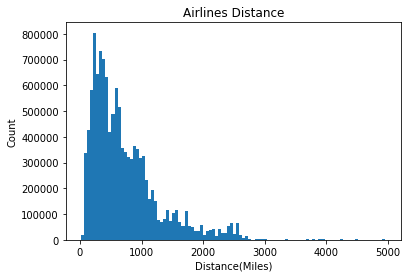

In [45]:
#Create an histogram for the distance column
plt.hist(data=Airline_copy, x='Distance',bins=100)
plt.xlabel('Distance(Miles)')
plt.ylabel('Count')
plt.title('Airlines Distance')
plt.show()

In [46]:
Airline_copy.Distance.describe()

count    1.194606e+07
mean     7.261584e+02
std      5.571762e+02
min      1.700000e+01
25%      3.250000e+02
50%      5.830000e+02
75%      9.570000e+02
max      4.962000e+03
Name: Distance, dtype: float64

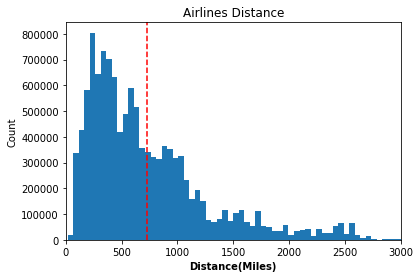

In [47]:
#Let us use the xlim method to zoom into the plot distribution of the data
plt.hist(data=Airline_copy, x='Distance',bins=100)
plt.xlim((0,3000))
plt.xlabel('Distance(Miles)', size=10, weight='bold')
plt.ylabel('Count')
plt.title('Airlines Distance')


Average_Distance=Airline_copy.Distance.mean()
plt.axvline(x=Average_Distance, color='r', linestyle='--', label='Average Distance')
plt.show()

From the plots on Distance above, we can see that the plot is skewed to the right, meaning that more flights have a flight distance of about 0 to around 1500 miles and less flights have a far distance of 1500 to 3000 miles, having an average distance of 726 miles.

Next, let us look at the Cancelled and CancellationCode(This contains the reasons for Flight cancellation) column

In [48]:
# create a variable that stores the value count of cancelled vs Not Cancelled Flights
df2=Airline_copy.Cancelled.value_counts()
df2

Not Cancelled    11623855
Cancelled          322210
Name: Cancelled, dtype: int64

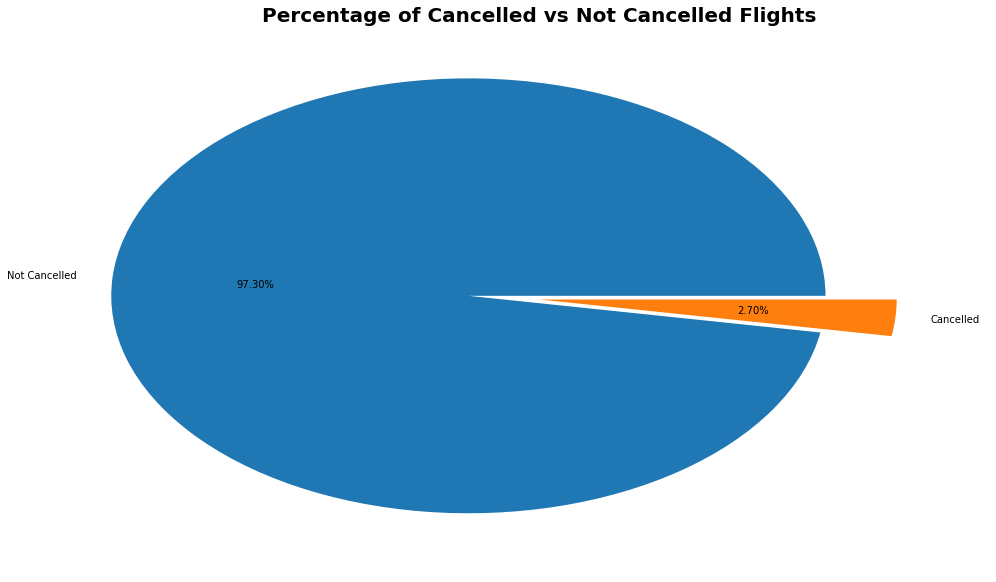

In [49]:
#Plot a pie chart that shows the percentage of cancelled and not cancelled flights
plt.figure(figsize=[16, 10])
plt.pie(x=df2, labels=df2.index, explode=(0.2, 0), autopct='%.2f%%')
plt.title('Percentage of Cancelled vs Not Cancelled Flights', size=20, weight='bold')
plt.show()

From the pie chart above, we can see that;
- Cancelled Flights accounts for 2.70% of the data
- Not Cancelled accounts for 97.30% of the data

Next, let us look into the reason for the 2.70% of cancelled flights by examining the CancellationCode column

In [50]:
# Create a variable that stores the reason for Cancelled flights and exclude value N which represents
# Null values
df3=Airline_copy.CancellationCode.value_counts()[1:]
df3

A    130375
B    128720
C     63085
D        30
Name: CancellationCode, dtype: int64

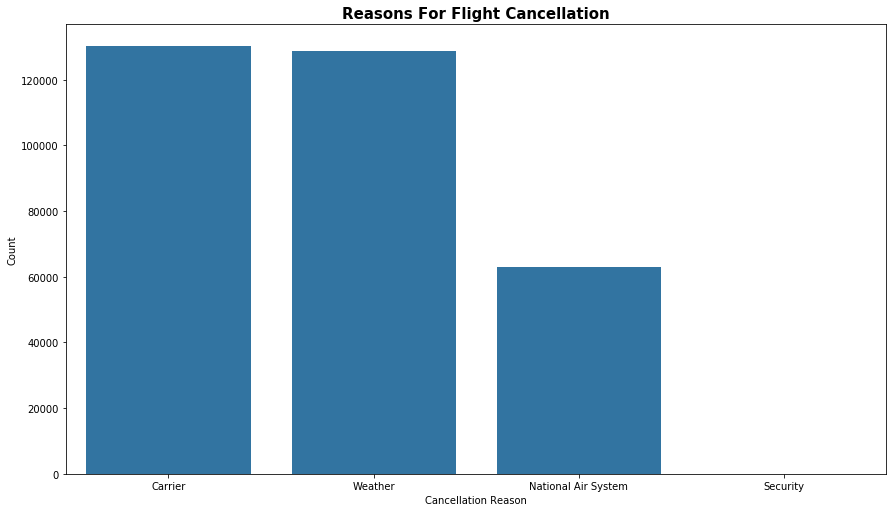

In [51]:
# create a bar chart for the various cancellation reasons
plt.figure(figsize=[14.70, 8.27])
base_color=sb.color_palette()[0]
g=sb.barplot(x=df3.index, y=df3.values, color=base_color)
g.set_xticklabels(['Carrier', 'Weather', 'National Air System', 'Security'])
plt.ylabel('Count')
plt.xlabel('Cancellation Reason')
plt.title('Reasons For Flight Cancellation', size =15, weight='bold')
plt.show()

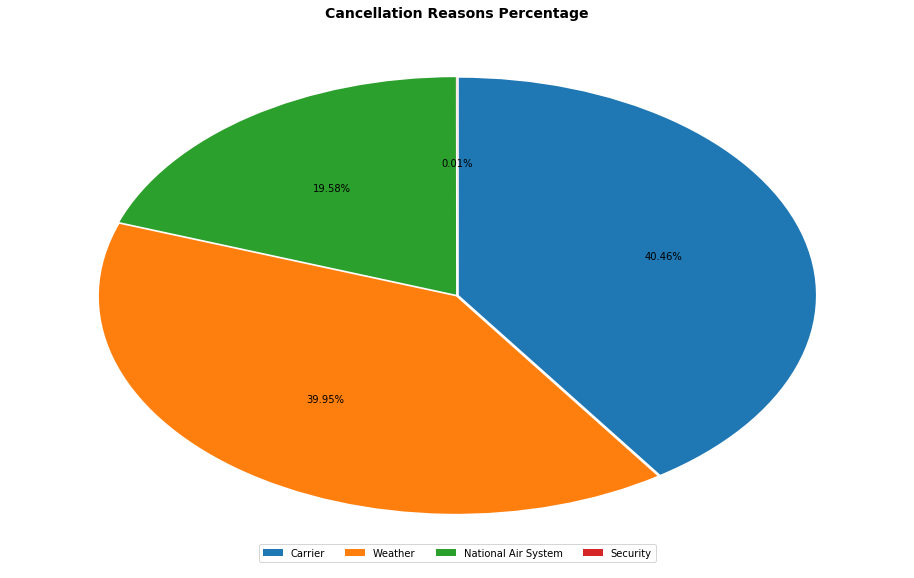

In [52]:
# plot a pie chart that shows the percentage of the reasons for cancellation
plt.figure(figsize=[16, 10]);
labels = ['Carrier', 'Weather', 'National Air System', 'Security']
explode = (0.005, 0.005, 0.005, 0.005)
# plot
plt.pie(Airline_copy['CancellationCode'].value_counts()[1:], explode=explode, autopct='%.2f%%',
        startangle=90, counterclock=False, textprops={'color':'black'});

# title
plt.title("Cancellation Reasons Percentage", weight='bold', size=14);
# legend
plt.legend(labels, loc=8, ncol=4);

plt.show()

From the plots above on the reasons for cancellation, we can see that most of the cancelled Flights were due to carrier and weather reasons with almost 40% each, followed by  the NAS (National Air System) with around 20%. And the security reasons having the least effect with 0.01%.

### Discussion of the distribution(s) of  variable(s) of interest. Were there any unusual points? Was there any transformations?

> The Univariate exploration of individual variables have yielded interesting insights. We first looked into the DepDelay column. The presence of outliers in the columns prevented us from seeing into the distribution of data of the DepDelay column. So we calculated and excluded the outliers, which made us see into the distribution of the data, which showed us that **more flights departed before the scheduled time or departed ontime, only few of the flights actually departed late**. we also had to exclude the outliers in the ArrDelay column which helped us to see into the distribution of the ArrDelay column, which had almost a normally distributed plot. **This showed us that some flight Arrived before the scheduled time or arrived ontime, and only a few flights Arrived late**.
A column was also created for the DepDelay column and the ArrDelay column, which indicates whether a flight  arrived or departed early or late. The creation of these columns helped us see that the **77.78%** of flights departed Ontime, that is departed before the scheduled time or 15 minutes before the scheduled time and **22.22%** of the flights departed late, that is departed greater than  or equal to 15 minutes after the scheduled time, and that **74.23%** of the flights arrived early, that is less than 15 minutes before the scheduled time, and that **25.77%** of the flights arrived late, that is greater tahn or equal to 15 minutes after the scheduled time. 
Since this project is interesting in knowing the major determinants of about **20%** delayed flights, we looked into the **Reasons for Delay and the Delay In Minutes** columns next. The Reasons For Delay column is an integration of the Carrier Delay, Weather Delay, NAS Delay, LateAircraft Delay and Security Delay columns, whose data was recorded in minutes(Delay In Minutes). The creation of this columns helped us determine the Average reasons for delay in minutes through out the year 2008. We noticed that although the Reasons for delay in minutes did not have up to 15 minutes delay on the average, but an interesting thing to note here is that the **Late Aircraft** has the highest delay in minutes of about 5 minutes, followed by **NAS**, **Carrier**, **Weather** and Security, having a very insignificant effect on the Average. This makes us Know that a major contributor to the **25.77%** of the Late Aircraft Arrival is the Late Aircraft Delay, this means that Flights arrived late because those same flights arrived late at another Airport. We also know that another major contributor to the late Flight Departure is the NAS, followed by Carrier then weather.
ALso, the Unique Carrier column which is used to identify Airlines according to their iata code, was used to create the Airlines columns, which identifies each Airlines according to their name not their iata code. After looking into the Airlines column, we could see that the **SouthWest Airlines co** had the most flight count for the year 2008, having total flight count of about 2 million, followed by the **American Airlines inc and the Skywest Airlines inc** having approximately 1 million flights in total for the year 2008, followed by the **American eagle airline inc and United Airline inc** having approximately 750000 flight counts.
Lastly, From the plots on Distance, we noticed that the plot is skewed to the right, meaning that more flights have a flight distance of about 0 to around 1500 miles and less flights have a far distance of 1500 to 3000 miles, having an average distance of 726 miles.

### Of the features  investigated, were there any unusual distributions? Was there any need to perform any operations on the data to tidy, adjust, or change the form of the data? If so, why was this done?

> We also looked at the Cancellation column and saw that Cancelled Flights accounts for 2.70% of the data and Flights that were not Cancelled accounts for 97.30% of the data. we can see that most of the cancelled Flights were due to carrier and weather reasons with almost 40% each, followed by the NAS (National Air System) with around 20%. And the security reasons having the least effect with 0.01%. 
**Note: Since it is assumed that only cancelled flights have properly documented reason for cancellation, hence the null values in the cancelledcode section was replaced with the alphabeth N.** 

## Bivariate Exploration

> In this section,  we will investigate relationships between pairs of variables in the
data. To start with, lets look at the relationship between the features in the dataset, by plotting a pairwise correlation matrix

In [53]:
# correlation between features in the dataset
Airline_copy.corr()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,DelayInMinutes
DepTime,1.000000,0.957045,0.699696,0.775759,-0.003960,-0.024661,-0.017543,-0.025359,0.176388,0.205934,-0.016936,-0.037756,0.015147,0.077811
CRSDepTime,0.957045,1.000000,0.675244,0.782391,-0.011679,-0.022792,-0.014043,-0.021499,0.107378,0.133693,-0.010774,-0.041913,0.005192,0.046786
ArrTime,0.699696,0.675244,1.000000,0.847057,-0.011021,0.029094,0.032270,0.025377,0.067800,0.079120,0.024144,0.008101,0.025822,0.026972
CRSArrTime,0.775759,0.782391,0.847057,1.000000,-0.022460,0.039966,0.048366,0.037798,0.104598,0.128264,0.040908,-0.005712,0.025155,0.045973
FlightNum,-0.003960,-0.011679,-0.011021,-0.022460,1.000000,-0.313527,-0.322100,-0.332892,0.039436,0.031296,-0.348577,0.008721,0.041745,0.014338
ActualElapsedTime,-0.024661,-0.022792,0.029094,0.039966,-0.313527,1.000000,0.975026,0.984792,0.076476,0.029348,0.956001,0.154089,0.257052,0.036637
CRSElapsedTime,-0.017543,-0.014043,0.032270,0.048366,-0.322100,0.975026,1.000000,0.983506,-0.005091,0.019667,0.979677,0.099510,0.131206,0.009722
AirTime,-0.025359,-0.021499,0.025377,0.037798,-0.332892,0.984792,0.983506,1.000000,0.020193,0.013178,0.973935,0.080955,0.100386,0.014600
ArrDelay,0.176388,0.107378,0.067800,0.104598,0.039436,0.076476,-0.005091,0.020193,1.000000,0.929751,-0.011319,0.113173,0.310942,0.436177
DepDelay,0.205934,0.133693,0.079120,0.128264,0.031296,0.029348,0.019667,0.013178,0.929751,1.000000,0.012122,0.018470,0.097857,0.421707


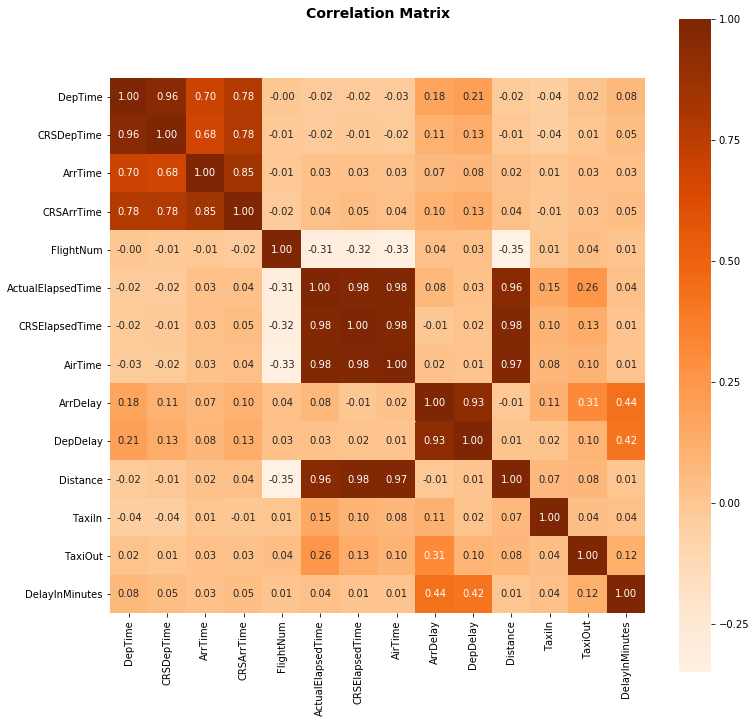

In [54]:
# correlation matrix
plt.figure(figsize=(12, 12))

sb.heatmap(Airline_copy.corr(), square=True, annot=True, fmt='.2f', cmap='Oranges', center=.3);

plt.title("Correlation Matrix", size=14, weight="bold", y=1.1)
plt.show()

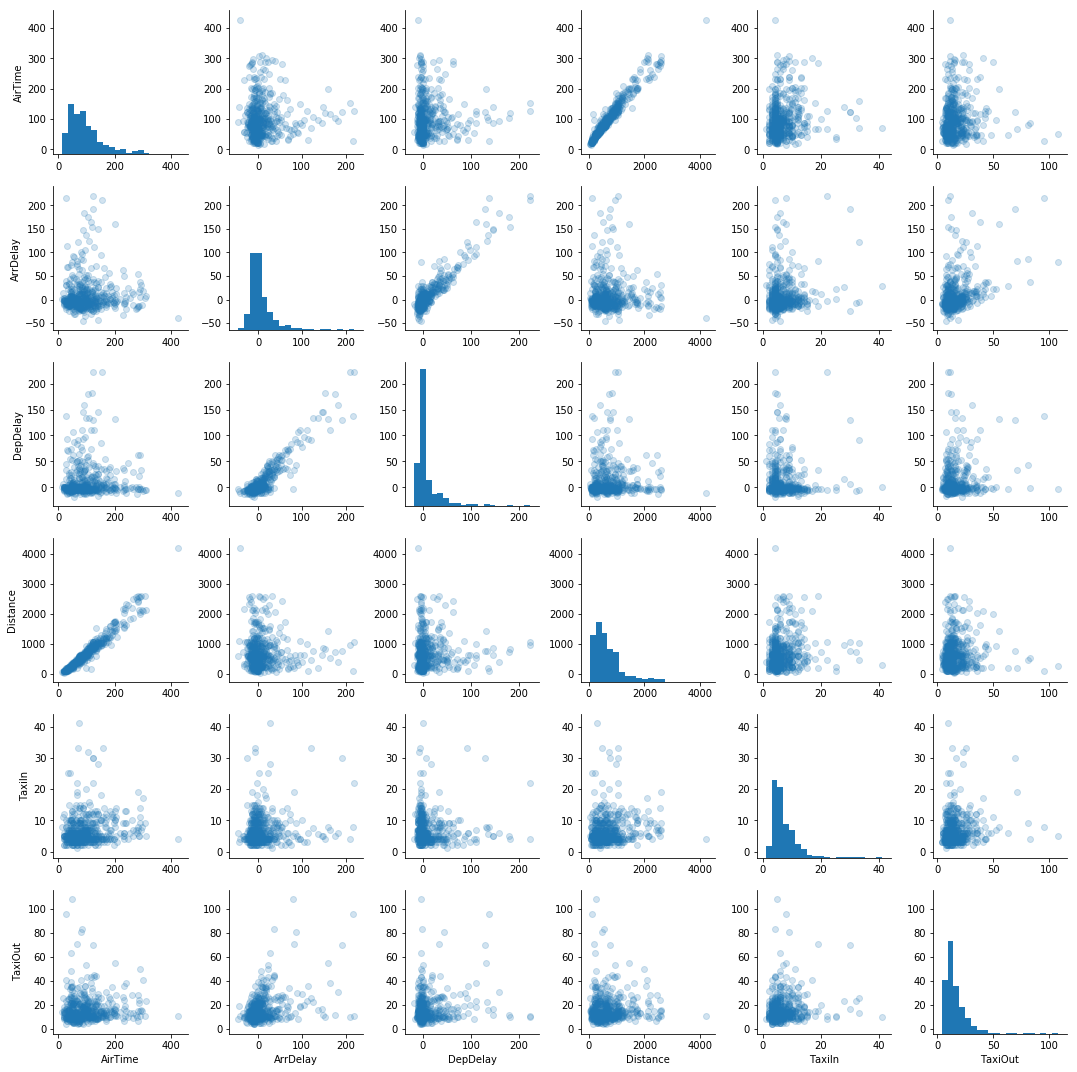

In [78]:
#  Create a Pair plot matrix

# Plot a pair plot matrix on a sample data, this makes it run faster
numerical_var = ['AirTime', 'ArrDelay','DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']
samples = np.random.choice(Airline_copy.shape[0], 500, replace=False)
airlines_samp = Airline_copy.loc[samples, :]

g = sb.PairGrid(data=airlines_samp, vars=numerical_var)

g.map_diag(plt.hist, bins=20);

g.map_offdiag(plt.scatter, alpha=1/5);

From the correlation matrix and the pair plot matrix above, we can note the following:

- One of the questions asked at the beginig of this project is if distance has any major effects on delays, The correlation matrix and pair plot matrix shows us that the distance variable has a very weak relationship with DepDelay and ArrDelay(-0.1 and 0.1 respectively).
- The ArrDelay variable has a strong correlation of 0.93 with the DepDelay column, this is expected because a flight delayed on its departure will arrive late. This relationship is also shown in the pair plot matrix, which shows the positive correlation between the two variables.
- The Distance  variable is highly correlated with variables such as ActualElapsedTime, CRSElapsedTime, AirTime having a correlation coefficient of 0.96, 0.98,0.97 respectively.
- Also, the DelayInMinutes variable that stores the reasons for delay in minutes have a correlation coefficient of 0.44 and 0.42 with ArrDelay and DepDelay columns respectively.

**Let us look futher into the Relationship between the ArrDelay and DepDelay Column since they are highly Correlated**

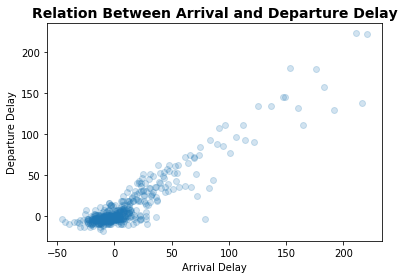

In [81]:
# Create a Scatter plot to depict the relationship between the Arrival and Departure Delay
sb.regplot(data=airlines_samp, x='ArrDelay', y='DepDelay', x_jitter=0.5,scatter_kws={'alpha':1/5}, fit_reg=False)
plt.xlabel('Arrival Delay')
plt.ylabel('Departure Delay')
plt.title('Relation Between Arrival and Departure Delay', weight='bold', size=14)
plt.show()

From the graph above that shows the relationship bewtween the Arrival and Departure Delays, we can see that the higher the departure delay, the higher the Arrival Delay. This relationship is obvious because if a flight is delayed for whatever reason on departure, it will Arrive at it's destination late. Also it is good to note that from the scatter plot above, we can see a large concentration of data points approximately between -25 to 50 minutes for the Arrival delay and almost the same for the departure delay column. This tells us that a lot of flights arrived or departed ontime.

Next, let us look into the between delay and DelayInMinutes

In [56]:
# Create a dataframe for each of the reasons for delay that does not contains the value 0.
ldf= Airline_copy[(Airline_copy['ReasonsForDelay']=='LateAircraftDelay') & (Airline_copy['DelayInMinutes'] != 0)]
NASdf= Airline_copy[(Airline_copy['ReasonsForDelay']=='NASDelay') & (Airline_copy['DelayInMinutes'] != 0)]
Carrierdf= Airline_copy[(Airline_copy['ReasonsForDelay']=='CarrierDelay') & (Airline_copy['DelayInMinutes'] != 0)]
Weatherdf= Airline_copy[(Airline_copy['ReasonsForDelay']=='WeatherDelay') & (Airline_copy['DelayInMinutes'] != 0)]
Securitydf= Airline_copy[(Airline_copy['ReasonsForDelay']=='SecurityDelay') & (Airline_copy['DelayInMinutes'] != 0)]

In [57]:
# Create a function that will show the relationship between specified variables
def myscatterplot(Data, ylabel, Title, Title1):
    plt.figure(figsize=[14.70, 8.27])
    plt.subplot(1,2,1)
    sb.regplot(data=Data, x='ArrDelay', y='DelayInMinutes', fit_reg=False,x_jitter=0.5, scatter_kws=
          {'alpha':1/5})
    plt.xlabel('Arrival Delay')
    plt.ylabel(ylabel)
    plt.title(Title, weight='bold', size=14)
    
    plt.subplot(1,2,2)
    sb.regplot(data=Data, x='DepDelay', y='DelayInMinutes', fit_reg=False,x_jitter=0.5, scatter_kws=
          {'alpha':1/5})
    plt.xlabel('Departure Delay')
    plt.ylabel(ylabel)
    plt.title(Title1, weight='bold', size=14)
    plt.show()
    print(Data[['ArrDelay', 'DelayInMinutes']].corr())
    print('\n')
    print(Data[['DepDelay', 'DelayInMinutes']].corr())
    return plt.show()

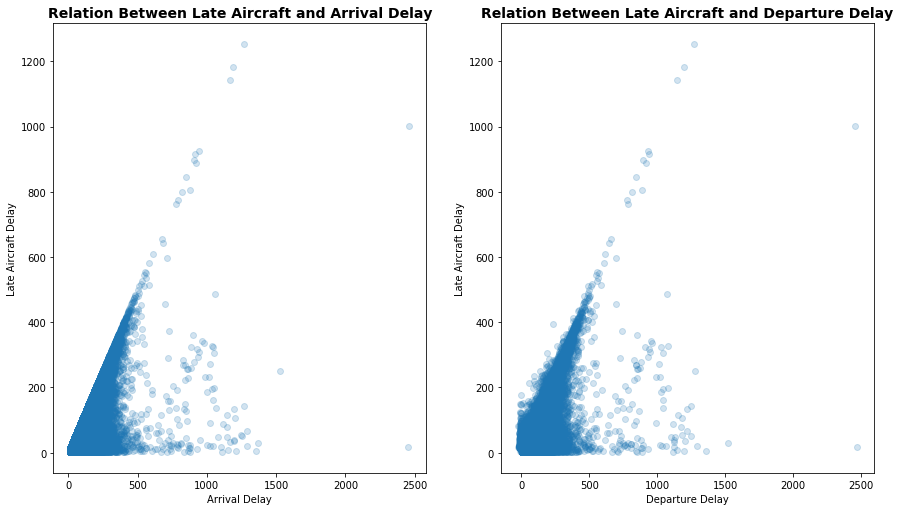

                ArrDelay  DelayInMinutes
ArrDelay        1.000000        0.797116
DelayInMinutes  0.797116        1.000000


                DepDelay  DelayInMinutes
DepDelay        1.000000        0.821941
DelayInMinutes  0.821941        1.000000


In [58]:
# Create a scatter plot that shows the relationship between late aircraft delay and
#  Arrival and Departure Delay
myscatterplot(ldf, 'Late Aircraft Delay', 
              'Relation Between Late Aircraft and Arrival Delay',
             'Relation Between Late Aircraft and Departure Delay')

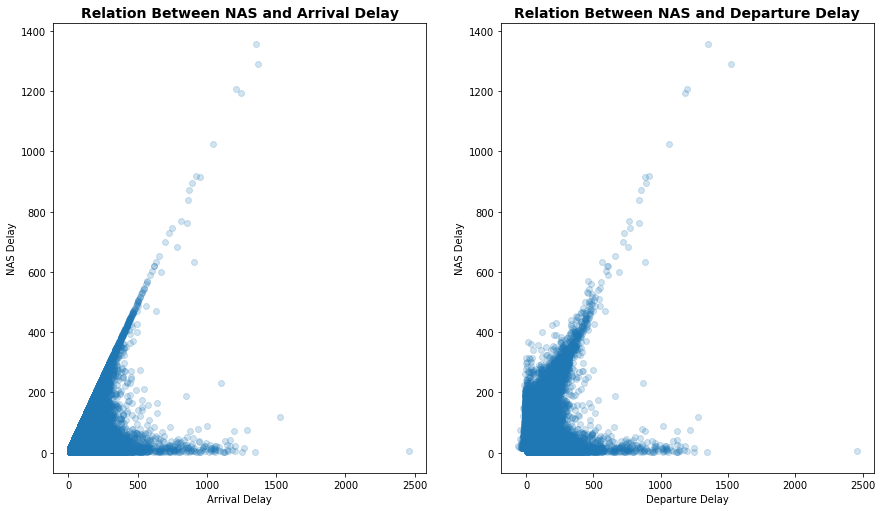

                ArrDelay  DelayInMinutes
ArrDelay        1.000000        0.513625
DelayInMinutes  0.513625        1.000000


                DepDelay  DelayInMinutes
DepDelay        1.000000        0.367479
DelayInMinutes  0.367479        1.000000


In [59]:
# Create a scatter plot that shows the relationship between NAS delay and
#  Arrival and Departure Delay
myscatterplot(NASdf, 'NAS Delay', 'Relation Between NAS and Arrival Delay',
             'Relation Between NAS and Departure Delay')

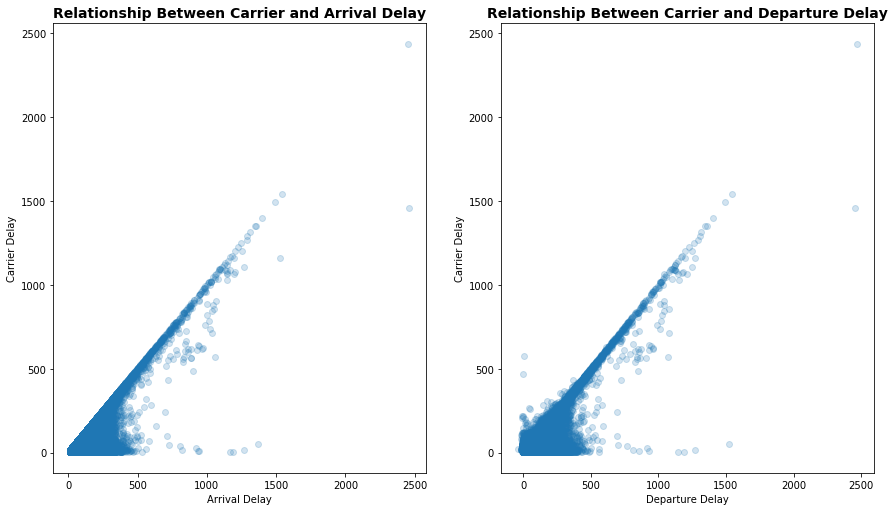

                ArrDelay  DelayInMinutes
ArrDelay        1.000000        0.823114
DelayInMinutes  0.823114        1.000000


                DepDelay  DelayInMinutes
DepDelay        1.000000        0.821856
DelayInMinutes  0.821856        1.000000


In [60]:
# Create a scatter plot that shows the relationship between Carrier delay and
#  Arrival and Departure Delay
myscatterplot(Carrierdf,'Carrier Delay', 'Relationship Between Carrier and Arrival Delay',
             'Relationship Between Carrier and Departure Delay')

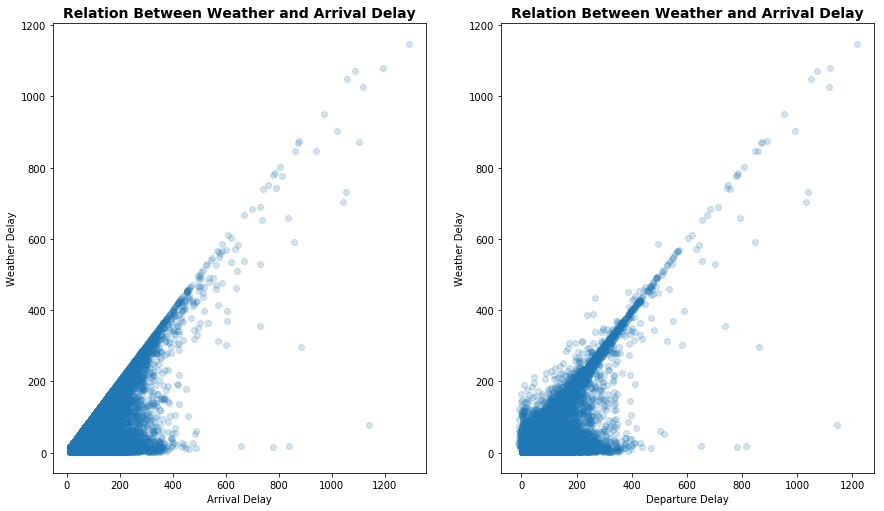

                ArrDelay  DelayInMinutes
ArrDelay        1.000000        0.733977
DelayInMinutes  0.733977        1.000000


                DepDelay  DelayInMinutes
DepDelay        1.000000        0.747325
DelayInMinutes  0.747325        1.000000


In [61]:
# Create a scatter plot that shows the relationship between Weather delay and
#  Arrival and Departure Delay
myscatterplot(Weatherdf, 'Weather Delay', 'Relation Between Weather and Arrival Delay',
             'Relation Between Weather and Arrival Delay')

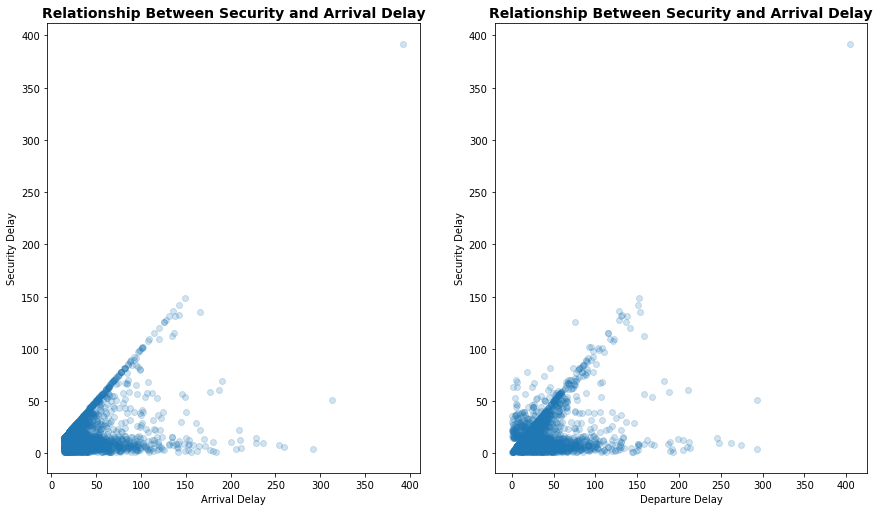

                ArrDelay  DelayInMinutes
ArrDelay        1.000000        0.397892
DelayInMinutes  0.397892        1.000000


                DepDelay  DelayInMinutes
DepDelay        1.000000        0.374496
DelayInMinutes  0.374496        1.000000


In [62]:
# Create a scatter plot that shows the relationship between Security delay and
#  Arrival and Departure Delay
myscatterplot(Securitydf,'Security Delay', 'Relationship Between Security and Arrival Delay',
            'Relationship Between Security and Arrival Delay')

From the scatter plots above, we can note the following:

- Carrier Delay, Late Aircraft Delay, and Weather Delay all have strong positive correlation with the Arrival and departure delay variables. This tells us that Carrier,LateAircraft and weather are the major causes of Flights Arrival and Departure Delay.
- Also, Security Delay have weak correlation with the Arrival and Departure Delay column.
- Lastly, the NAS(National Airspace System) has a moderate correlation with Arrival Delay and a weak correlation with Departure Delay

**Before going into multivariate analysis, let us look into relationship between airlines and delays**

In [63]:
# Create a dataframe that stores the average Arrival Delay by Airlines
dff1=Airline_copy.groupby('Airlines').mean()['ArrDelay'].sort_values()
dff1

Airlines
Aloha Airlines Inc.                                                                    -2.863333
Hawaiian Airlines Inc.                                                                 -1.135029
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)     2.963338
Alaska Airlines Inc.                                                                    5.483512
Frontier Airlines Inc.                                                                  7.236960
Southwest Airlines Co.                                                                  7.826015
Delta Air Lines Inc.                                                                    7.881450
JetBlue Airways                                                                        10.331879
Pinnacle Airlines Inc.                                                                 10.340967
Skywest Airlines Inc.                                                                  11.113554
AirTran Airways Corpo

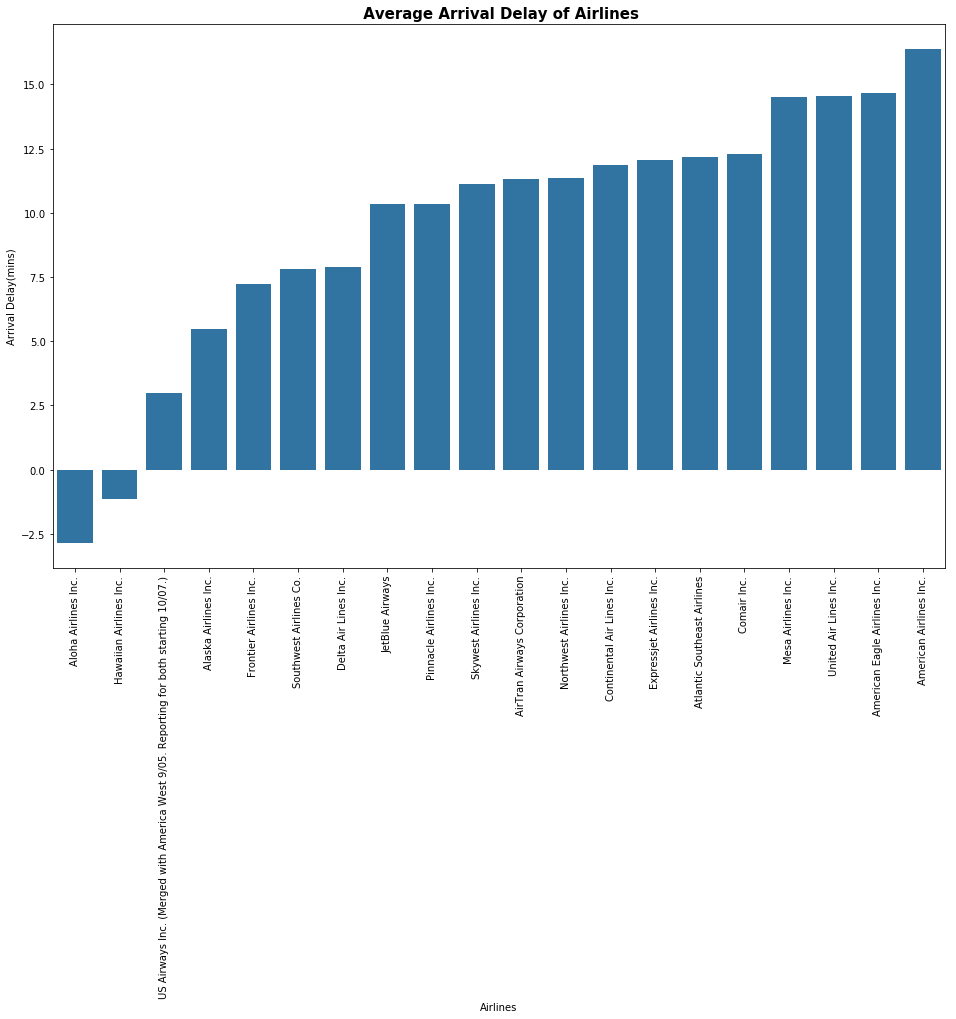

In [71]:
# Create a barchart that shows the relation between Airlines and Arrival Delay
base_color=sb.color_palette()[0]
plt.figure(figsize=[16,10])
sb.barplot(y=dff1.values, x=dff1.index, color=base_color)
plt.ylabel('Arrival Delay(mins)')
plt.xlabel('Airlines')
plt.title(' Average Arrival Delay of Airlines', size=15, weight='bold')
plt.xticks(rotation=90)
plt.show()

From the Adapted bar chart above on the relation between Airlines and Average Arrival Delays, we can note the following:

- Out of the 20 Airlines, only one airline namely **American Airlines inc** arrived late looking at the average arrival time, that is 15 minutes after the scheduled time of arrival, having an average arrival delay time 16.4 minutes respectively.
- Also, two Airlines namely **Aloha Airlines inc and Hawaiian Airlines inc**, departed before the scheduled time based on their average departure time for the year ,having a negative  average departure of -2.9 and -1.1 respectively.

**Let us look into the relation between Airlines and Departure Delay**

In [74]:
# Create a dataframe that stores the average Departure Delay by Airlines
dff2=Airline_copy.groupby('Airlines').mean()['DepDelay'].sort_values()
dff2

Airlines
Aloha Airlines Inc.                                                                    -1.371346
Hawaiian Airlines Inc.                                                                 -1.240495
Frontier Airlines Inc.                                                                  6.710034
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)     6.831160
Alaska Airlines Inc.                                                                    7.308419
Delta Air Lines Inc.                                                                    7.998171
Northwest Airlines Inc.                                                                 8.179350
AirTran Airways Corporation                                                             9.991670
Skywest Airlines Inc.                                                                  10.245994
Comair Inc.                                                                            11.885895
Southwest Airlines Co

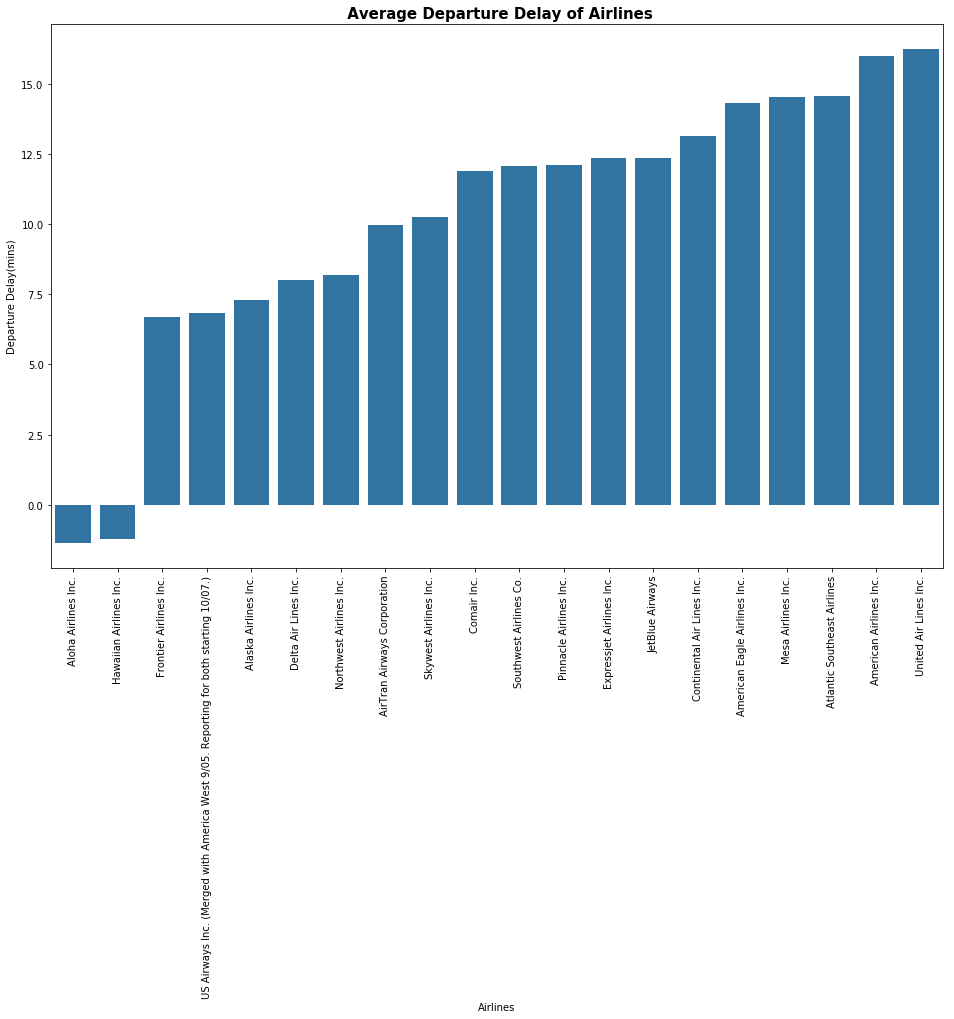

In [75]:
# Create a barchart that shows the relation between Airlines and Departure Delay
base_color=sb.color_palette()[0]
plt.figure(figsize=[16,10])
sb.barplot(y=dff2.values, x=dff2.index, color=base_color)
plt.ylabel('Departure Delay(mins)')
plt.xlabel('Airlines')
plt.title(' Average Departure Delay of Airlines', size=15, weight='bold')
plt.xticks(rotation=90)
plt.show()

From the Adapted bar chart above on the relation between Airlines and Average Departure Delays, we can note the following:

- Out of the 20 Airlines, only two airlines namely **United Airlines inc. and American Airlines inc** departed late looking at their average departure time, that is 15 minutes after the scheduled time of departure, having an average departure delay time of 16.0 and 16.3 minutes respectively.
- Also, two Airlines namely **Aloha Airlines inc and Hawaiian Airlines inc**, departed before the scheduled time based on their average departure time for the year ,having a negative  average departure of -1.4 and -1.2 respectively.

### Relationships observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the correlation matrix and the pair plot matrix during the Bivariate exploration, we following relatioships were observed:

- One of the questions asked at the beginig of this project is if distance has any major effects on delays, The correlation matrix and pair plot matrix shows us that the distance variable has a very  very weak relationship with DepDelay and ArrDelay(-0.1 and 0.1 respectively).
- The ArrDelay variable has a strong correlation of 0.93 with the DepDelay column, this is expected because a flight delayed on its departure will arrive late at it's destination. This relationship is also shown in the pair plot matrix, which shows the positive correlation between the two variables.
- Also, the DelayInMinutes variable that stores the reasons for delay in minutes have a correlation coefficient of 0.44 and 0.42 with ArrDelay and DepDelay columns respectively.

Due to the positive relation between the Arrival and Departure Delay column, a scatter plot was created, so that the distribution of points between the Arrival and Departure Delay column can be clearly seen, and from that plot we noted that they were a large concentration of data points approximately between -25 to 50 minutes for the Arrival delay and almost the same for the departure delay column. This tells us that a lot of flights arrived or departed ontime. After looking into the  distribution of datapoints between the Arrival and Departure Delay columns, we then moved into investigating the relation between the Reasons for Delay in minutes and the Arrival and Departure Delay columns. The following was noted from looking at the realtionship between these variables:

- Carrier Delay, Late Aircraft Delay, and Weather Delay all have strong positive correlation with the Arrival and departure delay variables. This tells us that Carrier,LateAircraft and weather are the major causes of Flights Arrival and Departure Delay.
- Also, Security Delay have weak correlation with the Arrival and Departure Delay column.
- Lastly, the NAS(National Airspace System) has a moderate correlation with Arrival Delay and a weak correlation with Departure Delay.

Lastly we looked into the relationship between the Airlines and the Arrival and departure delay columns and noted the following:

**Relation Between Arrival Delay and Airline**
- Out of the 20 Airlines, only one airline namely **American Airlines inc** arrived late looking at the average arrival time, that is 15 minutes after the scheduled time of arrival, having an average arrival delay time 16.4 minutes respectively.
- Also, two Airlines namely **Aloha Airlines inc and Hawaiian Airlines inc**, departed before the scheduled time based on their average departure time for the year ,having a negative  average departure of -2.9 and -1.1 respectively.

**Relation Between Depature Delay and Airline**
- Out of the 20 Airlines, only two airlines namely **United Airlines inc. and American Airlines inc** departed late looking at their average departure time, that is 15 minutes after the scheduled time of departure, having an average departure delay time of 16.0 and 16.3 minutes respectively.
- Also, two Airlines namely **Aloha Airlines inc and Hawaiian Airlines inc**, departed before the scheduled time based on their average departure time for the year ,having a negative  average departure of -1.4 and -1.2 respectively.


### Interesting relationships between the other features (not the main feature(s) of interest)?

 One interesting relation observed in this part of this study is the relation between the Some of the time variables and the distance variables, but since the main aim of this project is to investigate the major determinants of delay and factors that affect it, the relation between these time variables and the distance column was not investigated futher, but the following was noted:

- The Distance variable is highly correlated with variables such as ActualElapsedTime, CRSElapsedTime, AirTime having a correlation coefficient of 0.96, 0.98,0.97 respectively.

## Multivariate Exploration

> In this section, we will Create plots of three or more variables to investigate your data even
further. 

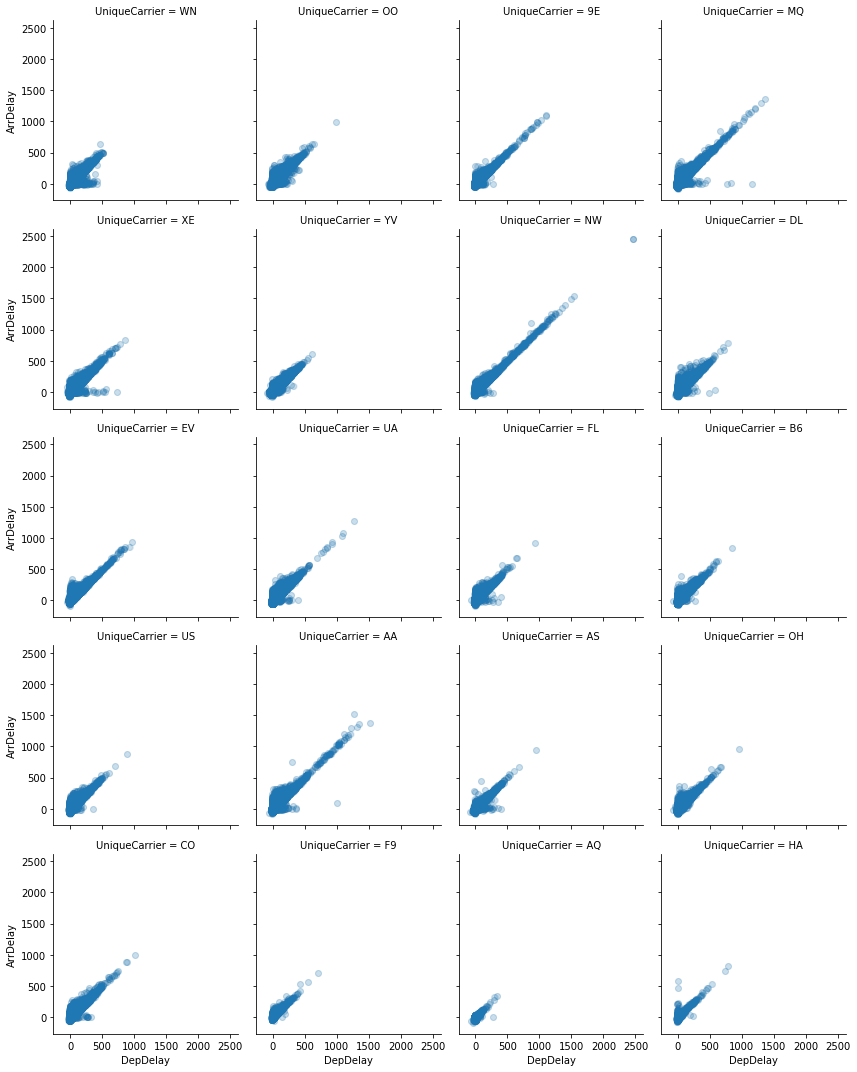

In [135]:
# Plot the relationship between arrival and departure delay for each Airline
g = sb.FacetGrid(data=Airline_copy, col='UniqueCarrier', col_wrap=4)
g.map(sb.regplot, 'DepDelay', 'ArrDelay', scatter_kws={'alpha':1/20}, x_jitter=0.5, fit_reg=False)

plt.show()

From the plot above, we can see that almost all the Airlines or Carriers have a strong positive relationship with the Arrival and Departure Delay Columns except for few notable carriers such as F9, AQ,HA.

In [89]:
# In the previous section, we noted that United Airlines inc. and American Airlines inc only had
# an average departure time that is above 15 minutes, let us look into the reason in this section
subset = Airline_copy.query('(UniqueCarrier == "UA") | (UniqueCarrier == "AA")')

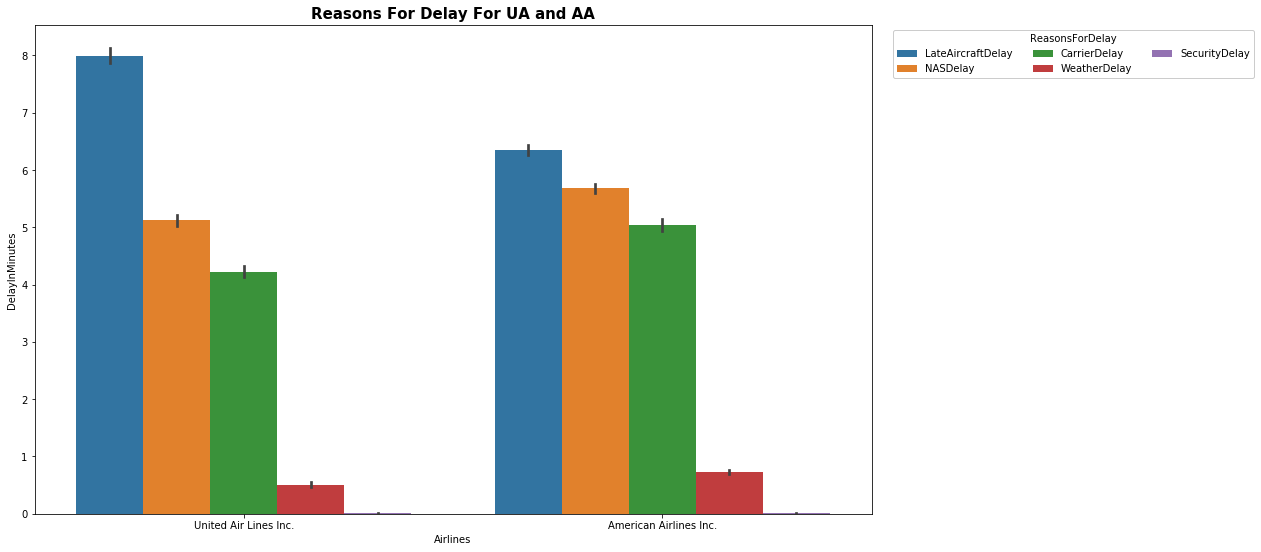

In [129]:
# Use an Adaptation of the clustered bar chart to Show the Reasons For Delay for 
# United AirLines inc and American Airlines inc.
plt.figure(figsize=[15,9])
ax=sb.barplot(data=subset, x='Airlines', y='DelayInMinutes', hue='ReasonsForDelay',
             hue_order=['LateAircraftDelay', 'NASDelay', 'CarrierDelay', 'WeatherDelay', 'SecurityDelay'])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=3, framealpha=1, title='ReasonsForDelay')
plt.title('Reasons For Delay For UA and AA', size=15, weight='bold')
plt.show()

From the bar plot above, we can see that for United Airlines inc. and American Airlines inc, most of their delayed Late Aircraft Delay, followed by NASDelay, then Carrier Delay, Weather Delay and Security Delay having a very very low effect on delay. 

Note: The mean value for United Airlines inc Late Aircraft Delay is higher than that of American Airlines inc Late Aircraft Delay, this implies that more flights were delayed due to Late Aircraft delay reasons for United Airlines inc. than  American Airlines inc. Where as American Airlines inc has higher mean values for NASDelay, Carrier and Weather Delay than the United Airlines inc. This implies that the delayed flights for  American Airlines inc is due to more NAS, Carrier and Weather delay than that of  the United Airlines inc.

### Relationships you observed in this part of the investigation. features that strengthened each other in terms of looking at feature(s) of interest?

> From the plots showing the relationship between the unique carriers or airlines and the Arrival and Departure Delay column, we were able to deduce that almost all the carriers had a positive relationship with the Arrival and Departure Delay column. Also, two Airlines, which had high average arrival and departure delay column, were looked into and it was noted thator United Airlines inc. and American Airlines inc, most of their delayed Late Aircraft Delay, followed by NASDelay, then Carrier Delay, Weather Delay and Security Delay having a very very low effect on delay.

Note: The mean value for United Airlines inc Late Aircraft Delay is higher than that of American Airlines inc Late Aircraft Delay, this implies that more flights were delayed due to Late Aircraft delay reasons for United Airlines inc. than American Airlines inc. Where as American Airlines inc has higher mean values for NASDelay, Carrier and Weather Delay than the United Airlines inc. This implies that the delayed flights for American Airlines inc is due to more NAS, Carrier and Weather delay than that of the United Airlines inc.

## Conclusions
>  From the Exploratory analysis conducted in this part of the project, we can note the following:

- Only a percentage of 22.22% of flights had Departure delay, which means most flights were not delayed on departure.
- From the pie chart that showed the relation between cancelled and not cancelled flights, we noted that;
Cancelled Flights accounts for 2.70% of the data, whose major cause was the Carrier and weather condition which accounts for about 40% each.
- Also, 25.77% of flights arrived late, that is the flights arrived 15 minutes later than the scheduled time
- It was noted after looking at the relation between Average Delay for year 2008 and the Reasons for delay that Late Aircraft, was a major reason for flights delay, followed by National Airspace System, Carrier, Weather, etc. It was also noted that Security had an insignificant effect on Delayed flights. This means that the security responsibilities were done properly and was not a major cause for flights delay
- Out of the 20 Airlines, it was noted that only the American Airline inc. had an Average delay greater than 15 minutes on it's arrival. Also, the American airlines inc. along with the United AirLines inc. had an average delay greater than 15 minutes on departure delay.
- The multivariate analysis revealed to us that Late Aircraft, NAS and Carrier were major determinants of delayed flights for American Airlines and United Airlines inc.
